<a href="https://colab.research.google.com/github/ladiaJeong/-01-classification/blob/master/%5B15%5D_%EB%8B%A4%EC%96%91%ED%95%9C_OCR%EB%AA%A8%EB%8D%B8_%EB%B9%84%EA%B5%90%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step1. 검증용 데이터셋 준비

### Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2 
import matplotlib.image as img
import keras_ocr

file_dir = os.getenv("HOME")+ '/aiffel/ocr_python/file'
file_list = os.listdir(file_dir)

file_list = [os.path.join(file_dir,file_list[i]) for i in range(len(file_list))]
file_list.sort()
file_list

['/aiffel/aiffel/ocr_python/file/.ipynb_checkpoints',
 '/aiffel/aiffel/ocr_python/file/0000.png',
 '/aiffel/aiffel/ocr_python/file/1.jfif',
 '/aiffel/aiffel/ocr_python/file/10.jfif',
 '/aiffel/aiffel/ocr_python/file/2.jfif',
 '/aiffel/aiffel/ocr_python/file/3.jfif',
 '/aiffel/aiffel/ocr_python/file/4.jfif',
 '/aiffel/aiffel/ocr_python/file/5.jfif',
 '/aiffel/aiffel/ocr_python/file/6.jfif',
 '/aiffel/aiffel/ocr_python/file/7.jfif',
 '/aiffel/aiffel/ocr_python/file/8.jfif',
 '/aiffel/aiffel/ocr_python/file/9.jfif']

In [ ]:


# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline() 

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


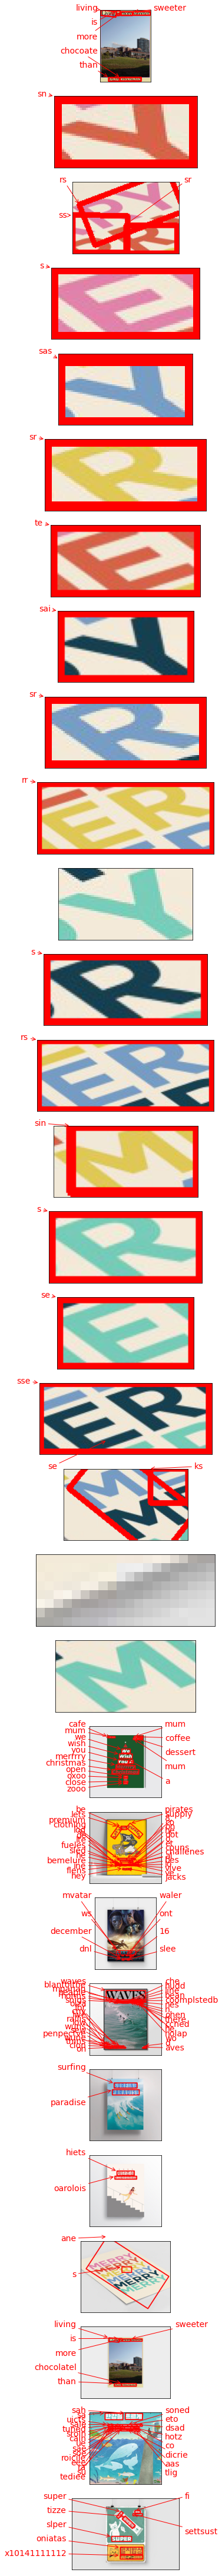

In [ ]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(80, 80))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [ ]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/file'
img_file_path = work_dir + '/3.jfif'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 




cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/file/0000.png


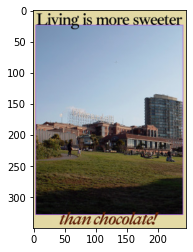

;, J

Done


In [ ]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        
        import cv2
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

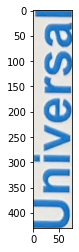

:



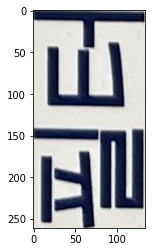

바



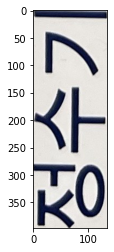

'



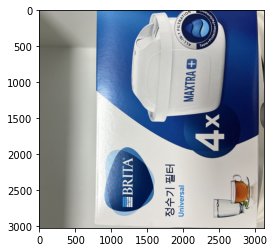

 ' .

Done


In [ ]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        
        import cv2
        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.show()
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

### Step3. 테스트 결과 정리



### Step4. 결과 분석과 결론 제시

 1. 여행중에 외국어 포스터를 보거나 상품을 구매했을때 내용을 읽어 번역할 수 있는 서비스를 생각했다. 

2. 검증용 데이터로 포스터와 상품 패키지를 읽여 보았는데 케라스 같은 경우는 박스 인식을 무척 잘하지만 정확하게 읽지는 못하였고, 테서렉트 같은 경우는 전체적으로 문자를 찾는것만 찾고, 놓치는 것이 많았으며, 찾아도 글자수를 축약해서 찾아 엉뚱하게 내 뱉는다. 

3. 비스듬하게 디자인 되어있는 문자는 스캔해서 읽는것이 무척이나 어려워 보였다. 코드 수정이 필요할 듯 하다. 혹은 박스의 축을 글자모양대로 비틀어야 할 것 같다. 그러면 사진을 수평 수직으로 잘 찍지 않아도 성능이 좋아질 것 같다.  